In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
# Load the dataset
df = pd.read_csv("D:\Projects\Elevate\Task 1\Titanic-Dataset.csv")  
# Basic information
print("First 5 rows of the dataset:\n", df.head())
print("\nShape of the dataset:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nNull values per column:\n", df.isnull().sum())

First 5 rows of the dataset:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            37345

In [3]:
# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Impute numerical columns with mean
mean_imputer = SimpleImputer(strategy='mean')
df[num_cols] = mean_imputer.fit_transform(df[num_cols])

# Impute categorical columns with the most frequent value
freq_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = freq_imputer.fit_transform(df[cat_cols])

# Verify no missing values
print("\nNull values after imputation:\n", df.isnull().sum())



Null values after imputation:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [4]:
# Use Label Encoding for simplicity (use OneHotEncoder for ML model input later)
label_encoder = LabelEncoder()

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

print("\nEncoded categorical columns:\n", df[cat_cols].head())


Encoded categorical columns:
    Name  Sex  Ticket  Cabin  Embarked
0   108    1     523     47         2
1   190    0     596     81         0
2   353    0     669     47         2
3   272    0      49     55         2
4    15    1     472     47         2


In [5]:
# Standardize numerical columns (mean=0, std=1)
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("\nStandardized numerical features:\n", df[num_cols].describe())



Standardized numerical features:
         PassengerId      Survived        Pclass           Age         SibSp  \
count  8.910000e+02  8.910000e+02  8.910000e+02  8.910000e+02  8.910000e+02   
mean   6.379733e-17  3.987333e-17 -8.772133e-17  2.232906e-16  4.386066e-17   
std    1.000562e+00  1.000562e+00  1.000562e+00  1.000562e+00  1.000562e+00   
min   -1.730108e+00 -7.892723e-01 -1.566107e+00 -2.253155e+00 -4.745452e-01   
25%   -8.650540e-01 -7.892723e-01 -3.693648e-01 -5.924806e-01 -4.745452e-01   
50%    0.000000e+00 -7.892723e-01  8.273772e-01  0.000000e+00 -4.745452e-01   
75%    8.650540e-01  1.266990e+00  8.273772e-01  4.079260e-01  4.327934e-01   
max    1.730108e+00  1.266990e+00  8.273772e-01  3.870872e+00  6.784163e+00   

              Parch          Fare  
count  8.910000e+02  8.910000e+02  
mean   5.382900e-17  3.987333e-18  
std    1.000562e+00  1.000562e+00  
min   -4.736736e-01 -6.484217e-01  
25%   -4.736736e-01 -4.891482e-01  
50%   -4.736736e-01 -3.573909e-01  
7

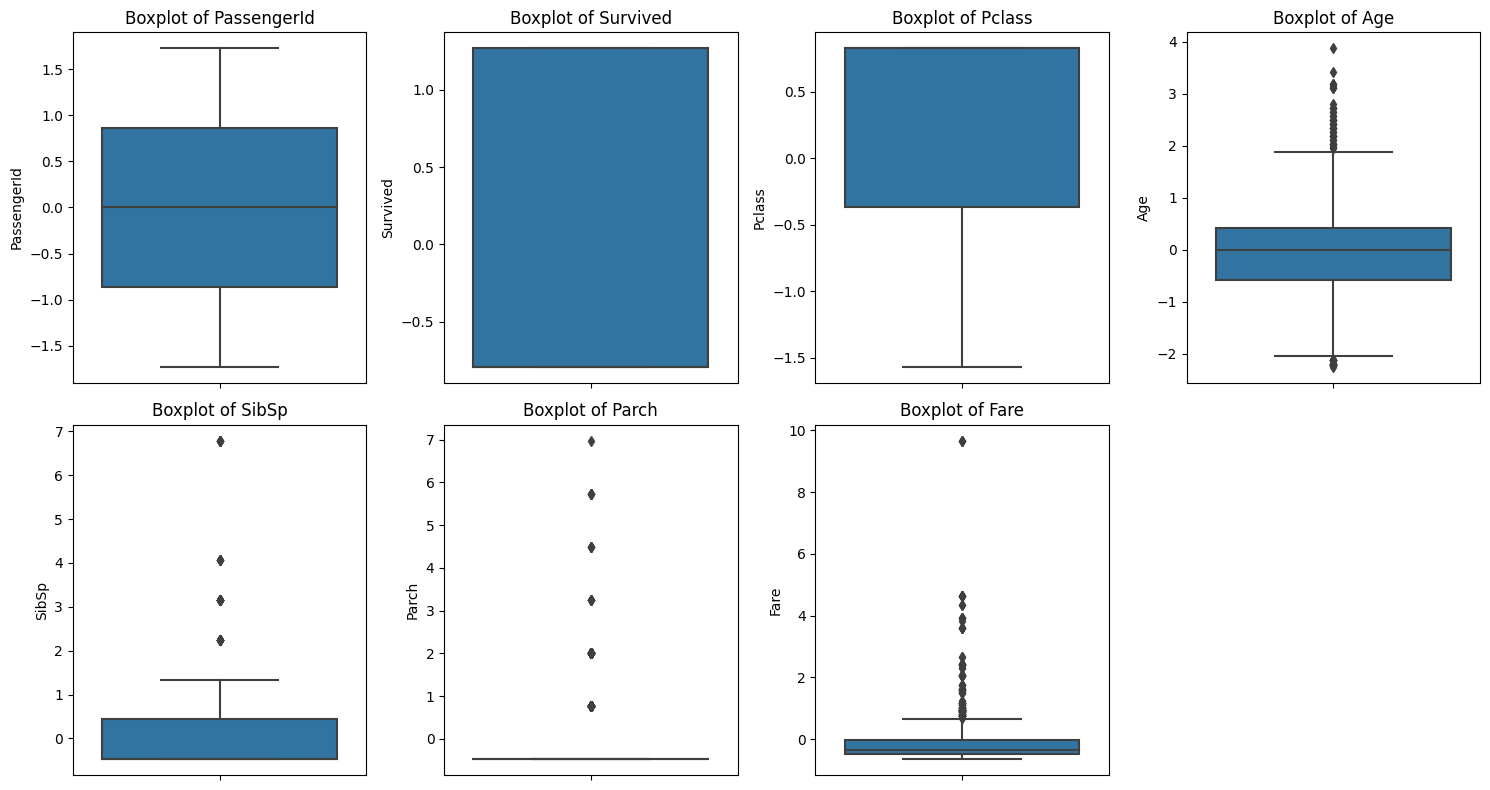


Shape after outlier removal: (561, 12)


In [6]:
# Boxplot to visualize outliers
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, len(num_cols)//2 + 1, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Remove outliers using IQR method
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

df_cleaned = remove_outliers(df, num_cols)

print("\nShape after outlier removal:", df_cleaned.shape)


In [ ]:
2